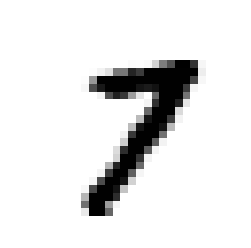

In [2]:
import numpy as np
import pandas as pd
import os
import struct
from sklearn.datasets import fetch_mldata
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

path = os.path.join('/home/secret', 'datasets')
def load_mnist(path, kind):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels.idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images.idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)
 
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels
train_images, train_labels = load_mnist(path, 'train')
test_images, test_labels = load_mnist(path, 't10k')

'''显示测试集中的一幅图像'''
some_data = train_images[40000]
some_data_image = some_data.reshape(28, 28)
plt.imshow(some_data_image, cmap=plt.cm.binary, interpolation='nearest')  # interpolation差值
plt.axis('off')  # 隐藏坐标轴
plt.show()

'''一些模型对数据的排序敏感，因此在训练之前先将数据的顺序打乱'''
shuffle_train_index = np.random.permutation(60000)  # permutation排序
x_train, y_train = train_images[shuffle_train_index], train_labels[shuffle_train_index]
shuffle_test_index = np.random.permutation(10000)
x_test, y_test = test_images[shuffle_test_index], test_labels[shuffle_test_index]
x_train, x_test = x_train.T, x_test.T
X_train = np.array(x_train, dtype=np.float64)
X_test = np.array(x_test, dtype=np.float64)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

def initial(tributes_num, output_num, sample_num):
    #param: 属性数  输出类别数 样本数量
    #output: 初始化的参数矩阵
    count = 0
    y_loss_parameters = np.zeros((output_num, sample_num))# 计算损失函数时用到的y矩阵
    for value in y_train:
        y_loss_parameters[value-1, count] = 1
        count += 1
    W = np.random.randn(tributes_num, output_num) / 100
    return W, y_loss_parameters

def softmax(y_pre_prob):
    #param: 输出层神经元输出矩阵
    #output: softmax函数输出
    return np.exp(y_pre_prob) / np.sum(np.exp(y_pre_prob), axis=0)

def propagate(W, X, y_loss_param, learning_rate, num_iteration):
    #param: W参数矩阵 训练集矩阵
    #output: 迭代后的W参数 cost
    cost = []
    for i in range(num_iteration):
        Z = np.dot(W.T, X)
        A = softmax(Z)
        L = - y_loss_param * np.log(A)
        cost.append(np.sum(L))
        for j in range(X.shape[1]):   # shape[1]为样本数
            A[np.nonzero(y_loss_param[:, j]!=0), j] -= 1
        dw = np.dot(X, A.T)
        W = W - learning_rate * dw
        #print(dw)
    return W, cost

def predict(X, W):
    #param: 训练集 W参数矩阵
    #output: 预测值
    Z = np.dot(W.T, X)
    A = softmax(Z)
    y_predict = np.argmax(A, axis=0) + 1
    return y_predict

In [36]:
W, y_loss_param = initial(X_train.shape[0], 10, X_train.shape[1])
W, cost = propagate(W, X_train, y_loss_param, 0.000001, 200)

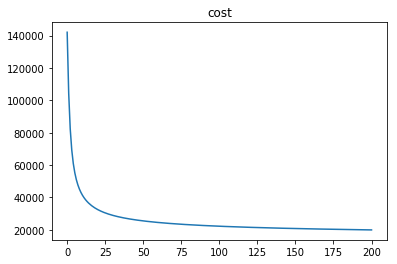

0.8175

In [37]:
#绘制cost图像
cost = np.array(cost)
plt.figure()
plt.plot(np.linspace(0, cost.shape, 200), cost)
plt.title('cost')
plt.show()
accuracy_score(y_test, predict(X_test, W))

In [ ]:
X_train = np.array(x_train, dtype=np.float64)
X_test = np.array(x_test, dtype=np.float64)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train, X_test = X_train.T, X_test.T
X_train

In [ ]:
accuracy_score(y_train, predict((X_train), W))

In [ ]:
ppxiaohui = np.array([[1, 0, 3],
                      [4, 2, 3]])
ppxiaohui1 = np.array([1, 0, 3])
print(np.argmax(ppxiaohui, axis=0))